# This short introduction uses Keras to:

1. Load a prebuilt dataset.
2. Build a neural network machine learning model that classifies images.
3. Train this neural network.
4. Evaluate the accuracy of the model.

In [1]:
import tensorflow as tf 
print("Tensorflow version", tf.__version__)

2024-02-10 13:18:42.908206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow version 2.15.0


# Load Dataset MNIST

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


# Build Machine Learning Model (Neural Network)

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [22]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-1.2321304 , -0.5359202 , -0.5596534 , -0.02796201,  0.13699643,
        -0.35347903, -0.27953908,  0.20456198, -0.0406341 ,  0.45209154]],
      dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[0.0332025 , 0.06660873, 0.06504649, 0.11069667, 0.13054946,
        0.07994002, 0.08607479, 0.13967492, 0.10930276, 0.17890362]],
      dtype=float32)

### cek dataset MNIST

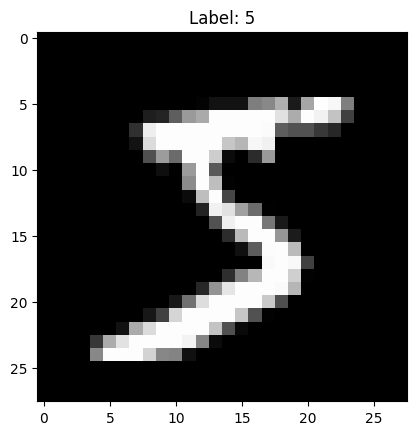

In [24]:
import matplotlib.pyplot as plt

index = 0
plt.imshow(x_train[index], cmap='gray')
plt.title(f'Label: {y_train[index]}')
plt.show()

### Define loss_fn

In [25]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [26]:
loss_fn(y_train[:1], predictions).numpy()

2.5264788

### configure and compile the model

In [27]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

# Train and Evaluate Model

In [28]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2024-02-10 14:07:10.320317: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2892 - accuracy: 0.9155
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1395 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1058 - accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9768


In [29]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0742 - accuracy: 0.9768 - 408ms/epoch - 1ms/step


[0.07417730987071991, 0.9768000245094299]

### membuat model baru dari model yang telah dibuat (ditumpuk)

In [30]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Testing Model

In [62]:
# model
index = 324
predictions = model.predict(x_test)
print(f"prediction data index ke-{index}", predictions[index])

313/313 [==============================] - 0s 1ms/step
prediction data index ke-324 [ 1.6464083 -4.4674387 -4.547344  -4.6660585 -3.0382776 -1.9508928
 -2.3397512 -1.9012114 -1.5272429 -1.5461026]


In [63]:
# probability_model
predictions_probability = probability_model.predict(x_test)
print(f"prediction_probability data index ke-{index}", predictions_probability[index])

313/313 [==============================] - 0s 1ms/step
prediction_probability data index ke-324 [0.85252655 0.00188581 0.00174099 0.0015461  0.00787363 0.02335715
 0.01583218 0.02454687 0.03567867 0.03501208]


10000
10000


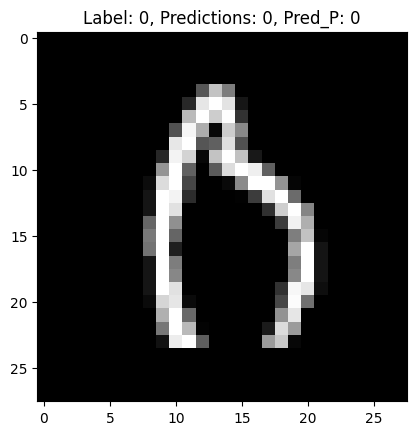

In [66]:
# cek apakah prediksinya benar
import numpy as np

predicted_class_predictions = np.argmax(np.array(predictions[index]))
predicted_class_predictions_probability = np.argmax(predictions_probability[index])

plt.imshow(x_test[index], cmap='gray')
plt.title(f"Label: {y_test[index]}, Predictions: {predicted_class_predictions}, Pred_P: {predicted_class_predictions_probability}")
# print(len(x_test))
# print(len(y_test))
# print(pred)